# **Lab 8.1 Simple MLP and CNN with Hyperparameter Grid Search**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.cuda.amp import autocast, GradScaler
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader,Subset
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

Complete the `load_data()` function that loads the image using `ImageFolder()` with the specific `transforms.compose()` provided below.
`load_data()` will return `DataLoader()` and print the information about the Dataset.
This function must load only a pair of classes from the entire dataset.
Please ensure that the final image is in RGBscale and has a size of 224x224.

`transforms.Compose()` :
- `transforms.Resize()`
- `transforms.ToTensor()`
- `transforms.Pad()`
- `transforms.RandomAffine(degrees=45, translate=(0.1, 0.1),scale=(0.8, 1.2), shear=45)`
- `transforms.Normalize()`

- `transforms.CenterCrop()`

Resource : [`transforms.Compose()`](https://pytorch.org/vision/main/generated/torchvision.transforms.Compose.html#compose), [`torchvision.transforms v1`](<https://pytorch.org/vision/stable/transforms.html#v1-api-reference:~:text=custom)%20tv_tensor%20type.-,V1%20API%20Reference,-Geometry>)

In [ ]:
def load_data(path):
    ### START CODE HERE ###
    train_loader = None
    test_loader = None



    ### END CODE HERE ###

    return train_loader, test_loader

Use your `load_data()` function to load the dataset in the cell below. Then, display the image from the first batch.

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

```
📃Train Dataset:
	Number of images in class 0: 307
	Number of images in class 1: 305
	Number of images in class 2: 305
	Number of images in class 3: 318
	Number of images in class 4: 316
	Number of images in class 5: 314
	Number of images in class 6: 307
	Number of images in class 7: 305
	Number of images in class 8: 312
	Number of images in class 9: 316
	Number of training samples: 3105

📃Test Dataset:
	Number of images in class 0: 81
	Number of images in class 1: 84
	Number of images in class 2: 84
	Number of images in class 3: 70
	Number of images in class 4: 72
	Number of images in class 5: 74
	Number of images in class 6: 81
	Number of images in class 7: 83
	Number of images in class 8: 76
	Number of images in class 9: 72
	Number of testing samples: 777
```


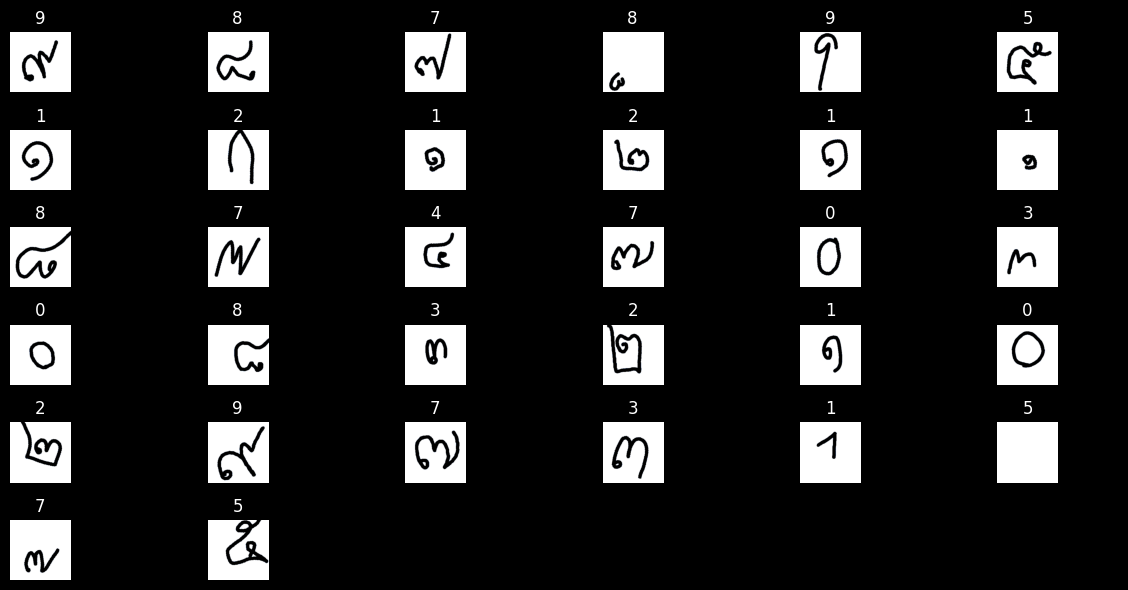

</details>

In [ ]:
### START CODE HERE ###
image_dir = None
train_loader, test_loader = load_data(image_dir)



### END CODE HERE ###

**Create Models**
1. **MLP (Multi-Layer Perceptron):**
- **Input:** Variable-size input, flattened to a 1D tensor
- **Architecture:** Multiple fully connected layers with ReLU activations and dropout
- **Output:** 10 neurons output layer
- **Description:** The MLP architecture consists of $N$ layers of fully connected layers with ReLU activations and dropout between each layer. The input is flattened and passed through these layers, which produces 10 class predictions.
2. **CNN (Convolutional Neural Network):**
- **Input:** Variable-size input, typically images with multiple channels
- **Architecture:** Multiple convolutional layers followed by fully connected layers with ReLU activations
- **Output:** 10 neurons output layer
- **Description:** The CNN architecture comprises $N$ blocks of Fully Convolutional Networks (FCNs), with each block consisting of convolutional layers followed by ReLU activations and max-pooling operations to extract hierarchical features from input images. After the FCNs, the output is flattened and passed through $N$ layers of fully connected layers with ReLU activations. Finally, the output layer produces 10 class predictions.
<details>
<summary>
<font size="3" color="orange">
<b>Example usage of MLP & CNN</b>
</font>
</summary>

- MLP
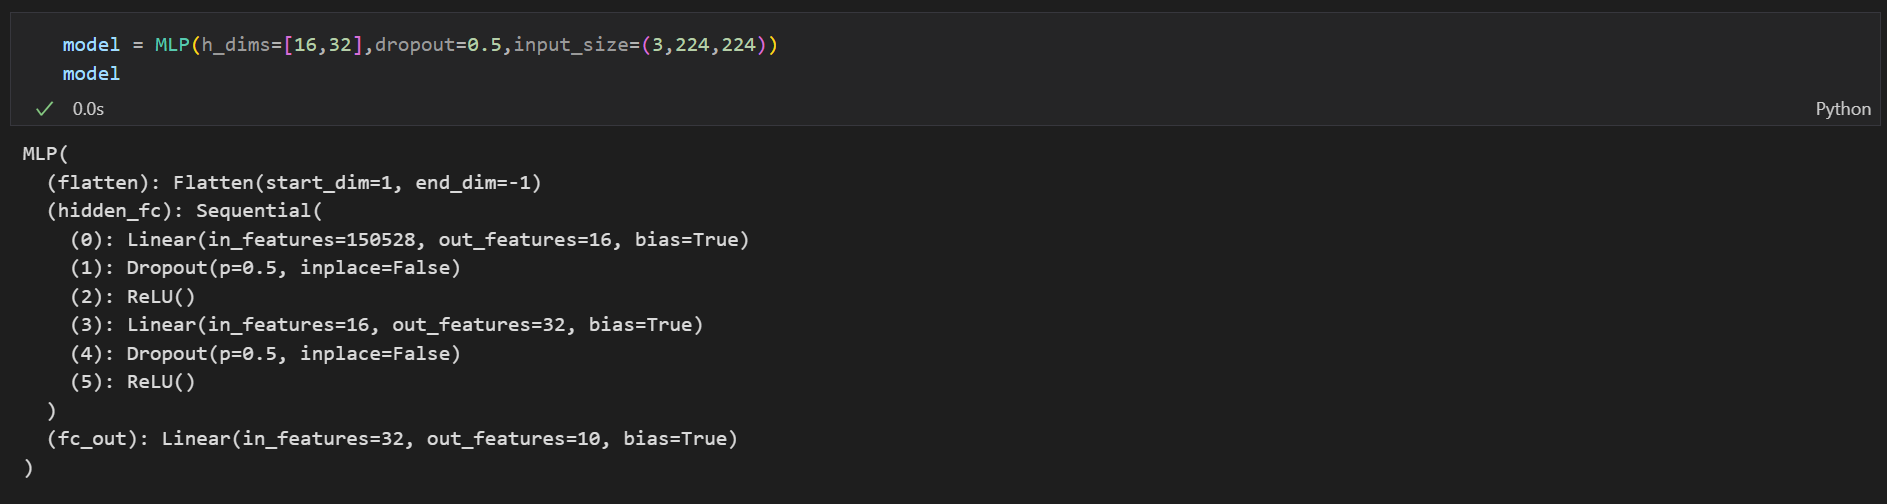

- CNN
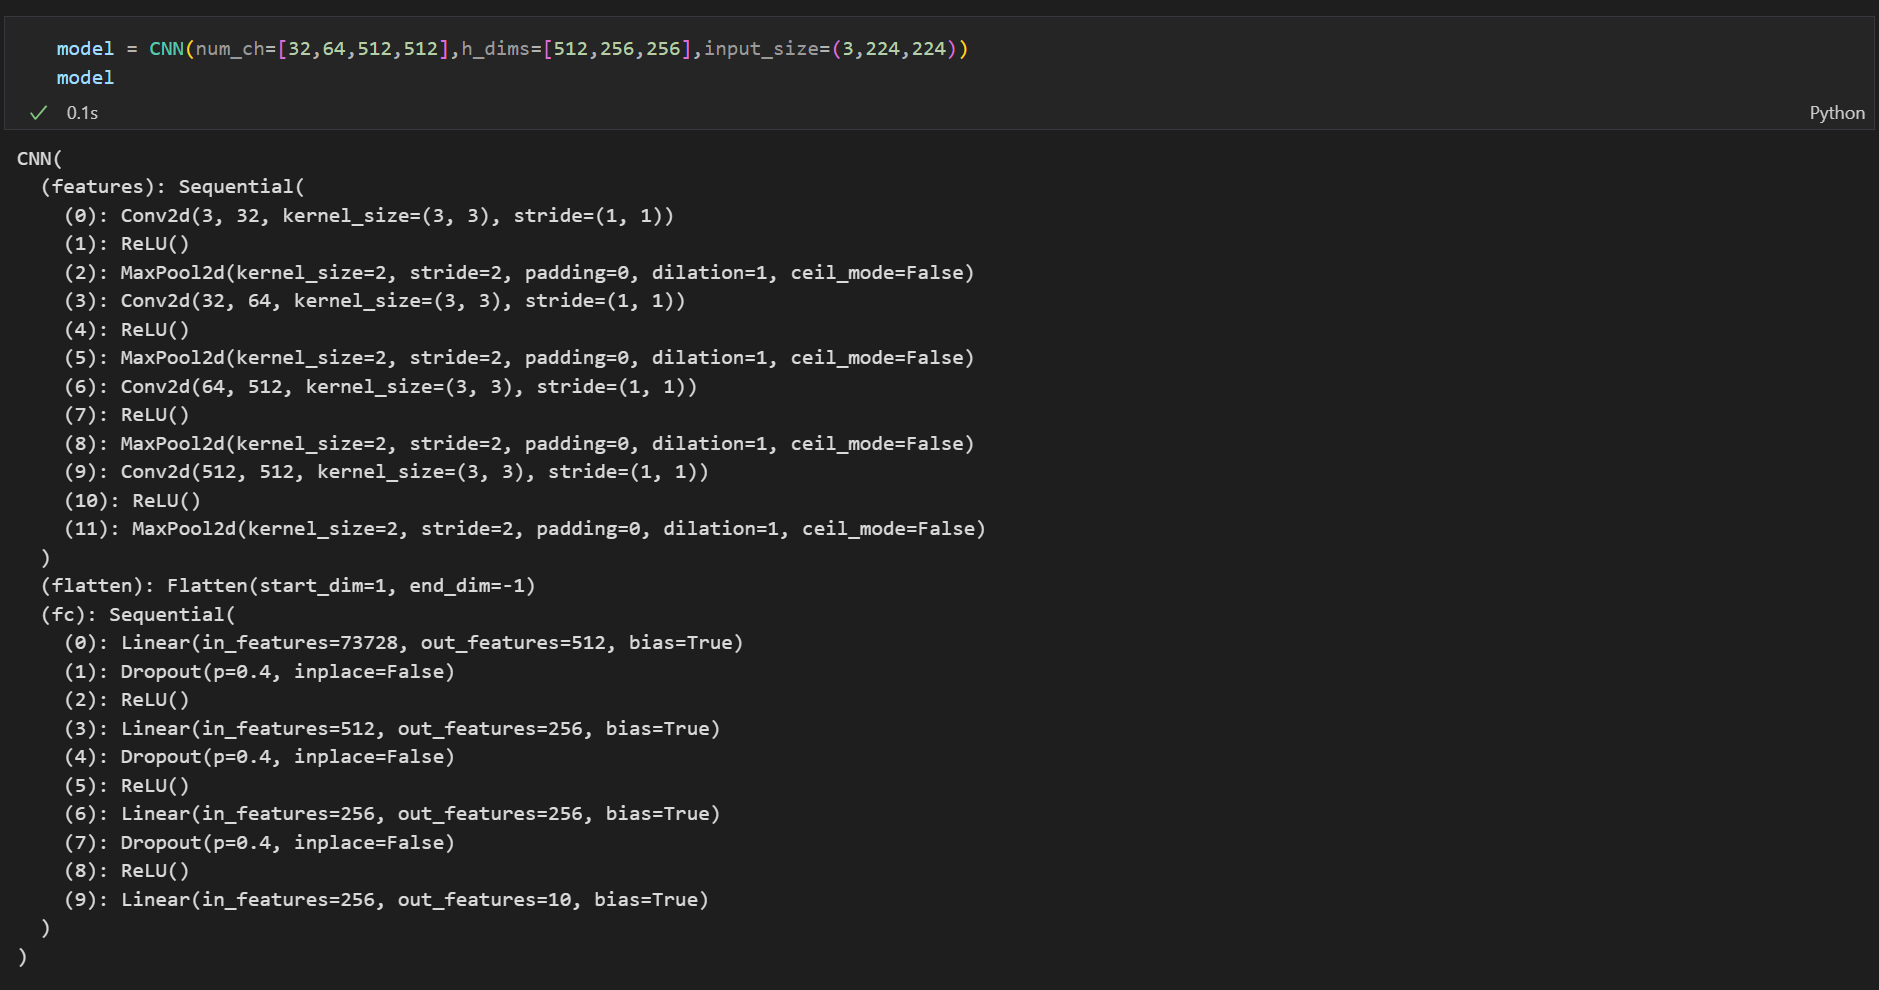

</details>
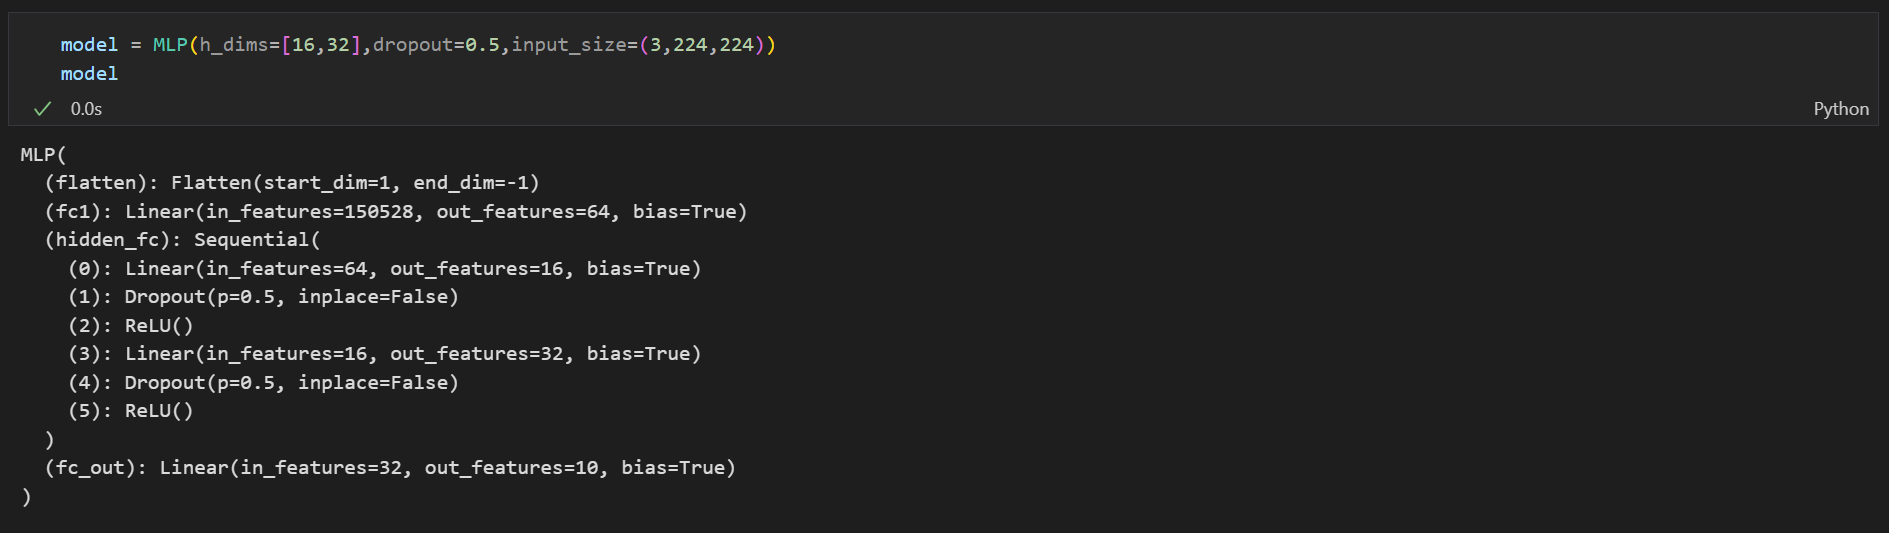

In [ ]:
class MLP(nn.Module):
    def __init__(self,h_dims=[16,32],dropout=0.5,input_size=(1,28,28)):
        super(MLP, self).__init__()
        ### START CODE HERE ###

        self.flatten = nn.Flatten()
        layers = []
        for i, hdim in enumerate(h_dims):
            if i == 0:
                layers.append(None)
            else:
                pass

        self.hidden_fc = nn.Sequential(*layers)

        self.fc_out = None
        ### END CODE HERE ###

    def forward(self, x):
        ### START CODE HERE ###
        
        pass

        ### END CODE HERE ###


    
class CNN(nn.Module):
    def __init__(self,num_ch=[16,32],h_dims=[16,32],input_size=(1,28,28)):
        super(CNN, self).__init__()
        ### START CODE HERE ###

        features = []
        for i, out_ch in enumerate(num_ch):
            if i == 0:
                features.append(None)
            else:
                pass

        self.features = nn.Sequential(*features)
        self.flatten = None
        layers = []
        for i, hdim in enumerate(h_dims):
            if i == 0:
                layers.append(None)
            else:
                pass

        self.fc = nn.Sequential(None)
        ### END CODE HERE ###

    
    def _get_input_size_fc1(self, input_shape):
        ### START CODE HERE ###

        pass

        ### END CODE HERE ###


    def forward(self, x):
        ### START CODE HERE ###

        pass

        ### END CODE HERE ###

Complete the `train()` function in the cell below. This function should evaluate the model at every epoch, log the training loss/accuracy, test loss/accuracy, and display the feature map from all layers of the model at every epoch on TensorBoard. Additionally, it should save the model at the last epoch.

Resource : [PyTorch Training loop](<https://pytorch.org/tutorials/beginner/introyt/trainingyt.html#:~:text=%3D0.9)-,The%20Training%20Loop,-Below%2C%20we%20have>), [TensorBoard](https://pytorch.org/docs/stable/tensorboard.html)


In [ ]:
def train(model,opt,loss_fn,train_loader,test_loader,epochs=10,writer=None,checkpoint_path=None,device='cpu'):
    ### START CODE HERE ###
    print("🤖Training on", device)
    model = model.to(device)
    for epoch in range(epochs):
        
        model.train()
        train_bar = tqdm(train_loader,desc=f'🚀Training Epoch [{epoch+1}/{epochs}]',unit='batch')
        
        for images, labels in train_bar:
            pass
            
        model.eval()
        test_bar = tqdm(test_loader,desc='📄Testing',unit='batch')
        for images, labels in test_bar:
            pass
        
    ### END CODE HERE ###

Let's train your model with 2 epochs to verify that your `train()` function works properly. After that, we'll move on to the Hyperparameter Grid Search in the next part.

In [ ]:
### START CODE HERE ###




### END CODE HERE ###

---

## **Hyperparameter Grid Search with Raytune**

*If you have access to APEX, I would recommend converting this part into a Python file and submitting the job to run on APEX using SBATCH. This process may take a considerable amount of time.*

You can import additional Ray Tune tools as you want, such as schedulers, search algorithms, etc. Further information on the usage of Ray Tune can be found [here](https://docs.ray.io/en/latest/tune/index.html).

In [ ]:
import ray
from ray import tune
from ray.air import session
from ray.tune.schedulers import ASHAScheduler
from ray.tune.search.optuna import OptunaSearch
from ray.tune.search import ConcurrencyLimiter


In [ ]:
def create_model(model_name,num_ch=None,h_dims=None,input_size=(1,100,100)):
    if model_name == 'cnn':
        model = CNN(num_ch=num_ch,h_dims=h_dims,input_size=input_size)
    elif model_name == 'mlp':
        model = MLP(h_dims=h_dims,dropout=0.5,input_size=input_size)
    return model

Complete the `train_raytune()` function below, following the [quick start guide](https://docs.ray.io/en/latest/tune/index.html). This function will be passed to the `tune.Tuner`.

In [ ]:
def train_raytune(config):
    ### START CODE HERE ###
    loss_fn = None
    image_dir = None
    train_loader, test_loader = load_data(image_dir)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = None
    model = model.to(device)
    opt = None
    if config['optimizer'] == 'Adam':
        pass
    elif config['optimizer'] == 'SGD':
        pass
    for epoch in range(config['num_epochs']):
        model.train()

        for images, labels in train_loader:
            pass

        
        model.eval()
        for images, labels in test_loader:
            pass

        session.report({
            "train_loss": None,
            "train_accuracy": None,
            "val_loss": None,
            "val_accuracy": None,
        })
    ### END CODE HERE ###


Initialize Ray, define the search space, specify the search algorithm, set up the scheduler, and resources.

Resource : 
- [A Guide To Parallelism and Resources for Ray Tune](https://docs.ray.io/en/latest/tune/tutorials/tune-resources.html#:~:text=A%20Guide%20To%20Parallelism%20and%20Resources%20for%20Ray%20Tune) 
- [Working with Tune Search Spaces](https://docs.ray.io/en/latest/tune/tutorials/tune-search-spaces.html#tune-search-space-tutorial:~:text=Working%20with%20Tune%20Search%20Spaces)
- [How to configure logging in Tune?](https://docs.ray.io/en/latest/tune/tutorials/tune-output.html) 
- [Tune Trial Schedulers (`tune.schedulers`)](https://docs.ray.io/en/latest/tune/api/schedulers.html#tune-scheduler-pbt:~:text=Tune%20Trial...-,Tune%20Trial%20Schedulers%20(tune.schedulers),-%23)

#### **Grid Search for MLP**
**Search Space:**
 - Specify a range of configurations for your MLP, incorporating variations in both the number of nodes and layers. Ensure you include ***at least 5 different sets*** of configurations. 
 - num epochs = `[10, 20, 50, 100]`
 - batch_sizes = `[16, 32, 64]`
 - opts = `["Adam","SGD"]`
 - lr = `[1e-3, 1e-4, 1e-5,1e-6]`

In [ ]:
### START CODE HERE ###
ray.init(num_gpus=1)
models_ls = ["mlp"]
n_layers = None
n_nodes = None
h_dims = None
lr = None
batch_size = None
num_epochs = None
opts = ["Adam","SGD"]

config = {
    'model_name': tune.grid_search(models_ls),
    'h_dims': None,
    'optimizer': None,
    'lr': None,
    'batch_size': None,
    'num_epochs': None,
}

tuner = tune.Tuner(
    tune.with_resources(train_raytune, resources=None),
    tune_config=tune.TuneConfig(
        metric=None,
        mode=None,
        scheduler=None,
    ),
    param_space=config,
)
result = tuner.fit()
### END CODE HERE ###

Get the report from Grid Search to CSV file.

In [ ]:
print("🎉[INFO] Training is done!")
print("Best config is:", result.get_best_result().config)
print("Best result is:", result.get_best_result())
df = result.get_dataframe()
df.to_csv()

ray.shutdown()

#### **Grid Search for CNN**
**Search Space:**
 - Specify a range of configurations for your CNN, incorporating variations in both the number of nodes and layers in both Feature Extractor part and Fully connected part. Ensure you include ***at least 5 different sets*** of configurations of each part. 
 - num epochs = `[10, 20, 50, 100]`
 - batch_sizes = `[16, 32, 64]`
 - opts = `["Adam","SGD"]`
 - lr = `[1e-3, 1e-4, 1e-5,1e-6]`

In [ ]:
### START CODE HERE ###
ray.init(num_gpus=1)

models_ls = ["cnn"]
num_ch = None
h_dims = None
lr = None
batch_size = None
num_epochs = None
opts = None

config = {
    'model_name': tune.grid_search(models_ls),
    'h_dims': None,
    'num_ch': None,
    'optimizer': None,
    'lr': None,
    'batch_size': None,
    'num_epochs': None,
}


tuner = tune.Tuner(
    tune.with_resources(train_raytune, resources=None),
    tune_config=tune.TuneConfig(
        metric=None,
        mode=None,
        scheduler=None,
    ),
    param_space=config,
)
result = tuner.fit()
### END CODE HERE ###

Get the report from Grid Search to CSV file.

In [ ]:
print("🎉[INFO] Training is done!")
print("Best config is:", result.get_best_result().config)
print("Best result is:", result.get_best_result())
df = result.get_dataframe()
df.to_csv()

ray.shutdown()

---

Train both the MLP and CNN models using the best hyperparameter set obtained from the grid search. Then, save the model weights to a .pth file.

In [ ]:
image_dir = None
train_loader, test_loader = load_data(image_dir)

In [ ]:
model = None
opt = None
loss_fn = None
model

In [ ]:
train(None)

**For CNN only**

Use the `FeatureExtractor()` class and `visualize_feature_map()` function to visualize the feature map of ***ALL*** layers of the Convolution Feature Extractor part. Then, save it as an image.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- layer name : features.0<br>


- layer name : features.1<br>

- and so on . . . 
</details>

In [ ]:
class FeatureExtractor(nn.Module):
    def __init__(self, model, target_layers):
        super(FeatureExtractor, self).__init__()
        self.model = model
        self.target_layers = target_layers
        self.features = []

        for layer_name, layer in self.model.named_modules():
            if layer_name in target_layers:
                print(layer_name)
                layer.register_forward_hook(self.save_feature(layer_name))

    def save_feature(self, layer_name):
        def hook(module, input, output):
            self.features.append(output.clone())
        return hook

    def forward(self, x):
        self.features = [] 
        self.model(x)  
        return self.features 

In [ ]:
def visualize_feature_map(x,base_filename):
    ### START CODE HERE ###
    
    pass

    ### END CODE HERE ###


In [ ]:
### START CODE HERE ###
layer_names = []
for layer_name, layer in model.named_modules():
    pass




### END CODE HERE ###

Display the confusion matrix and Classification Report for both models 

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
This is just an example of CNN. You should have 2 model : MLP, CNN.
```
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        81
           1       0.91      0.80      0.85        84
           2       0.91      0.85      0.88        84
           3       0.83      0.84      0.84        70
           4       0.82      0.78      0.80        72
           5       0.89      0.88      0.88        74
           6       0.91      0.83      0.86        81
           7       0.91      0.81      0.85        83
           8       0.57      0.89      0.70        76
           9       0.91      0.81      0.85        72

    accuracy                           0.84       777
   macro avg       0.85      0.84      0.84       777
weighted avg       0.85      0.84      0.84       777
```

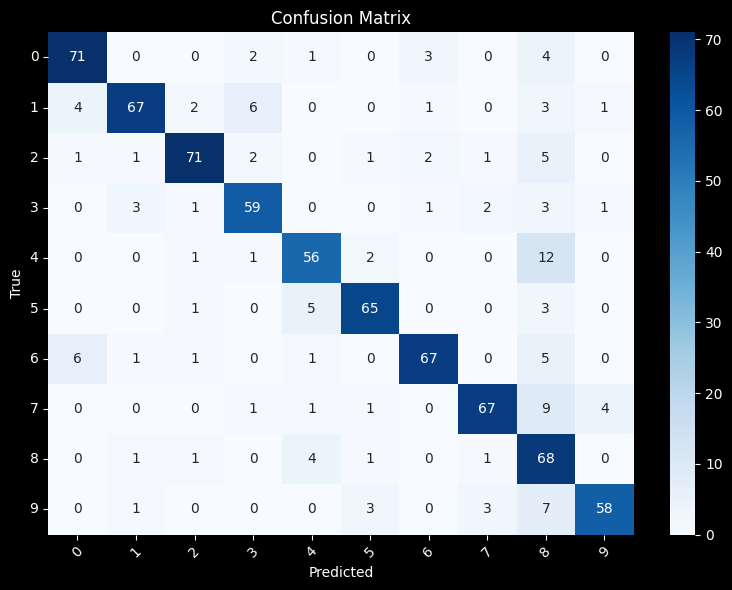

</details>

In [ ]:
def load_model(model,model_path):
    ### START CODE HERE ###


    ### END CODE HERE ###
    return model


### START CODE HERE ###





### END CODE HERE ###

Questions
1. How many combinations of hyperparameter values (trials) were evaluated during the hyperparameter tuning process?
2. What are the top 3 best parameters and their corresponding tuning results for the model?
3. Analyze and compare the similarities and differences between the top 3 parameters in terms of model architecture, loss, accuracy, ability to predict numeric classes, and best and worst class performance.
4. Considering an application where false positives are critical, which model parameters would you suggest?
5. Evaluate the precision, recall, and F1-score metrics to determine which one is the most suitable for measuring model performance. Should we rely on only a single metric to choose the best model parameter?

